# Dynamics in a fock basis
First we create a basis, we define the standard creation and annihilation operators, and then  we build the Hamiltonian
$$H =\omega\left(a^\dagger a + \frac{1}{2}\right) $$

In [1]:
using QuantumOptics
using PyPlot

N = 12;
b = FockBasis(N) 
vac = basisstate(b,1)
a = destroy(b)
a⁺ = dagger(a)
ω = sqrt(2)
H = ω*(a⁺*a+0.5*one(b));

If we check the commutation relation between $a$ and $a^\dagger$, we can notice a small numerical error, theoreticaly we should obtain 1, but if we compute $[a,a^\dagger] - 1$, which should give 0, we obtain numbers in the order of $10^{-16}$

In [2]:
comm = a⁺*a-a*a⁺ + one(b)

SparseOperator(dim=13x13)
  basis: Fock(cutoff=12)
  [2 ,  2]  =  -4.44089e-16+0.0im
  [3 ,  3]  =  8.88178e-16+0.0im
  [4 ,  4]  =  -4.44089e-16+0.0im
  [5 ,  5]  =  -8.88178e-16+0.0im
  [6 ,  6]  =  1.77636e-15+0.0im
  [7 ,  7]  =  -1.77636e-15+0.0im
  [8 ,  8]  =  -8.88178e-16+0.0im
  [9 ,  9]  =  1.77636e-15+0.0im
  [10, 10]  =  -1.77636e-15+0.0im
  [11, 11]  =  1.77636e-15+0.0im
  [12, 12]  =  1.77636e-15+0.0im
  [13, 13]  =  13.0+0.0im

With the function eigenstates() we can construct the eigenstates and their eigenvalues of the Hamiltonian

In [3]:
Ev,ϕv = eigenstates((H+dagger(H))/2,3);
real(Ev[1:3])

3-element Array{Float64,1}:
 0.707107
 2.12132 
 3.53553 

A coherent state can be build with the function coherentstate(), or by creating the displacement operator 
$$D(\alpha) = e^{\alpha a^\dagger - \alpha a} $$

In [4]:
α = 1.5 
ψα = coherentstate(b,α)

D = expm(full(α*a⁺ - α*a))
ψβ = D*vac;

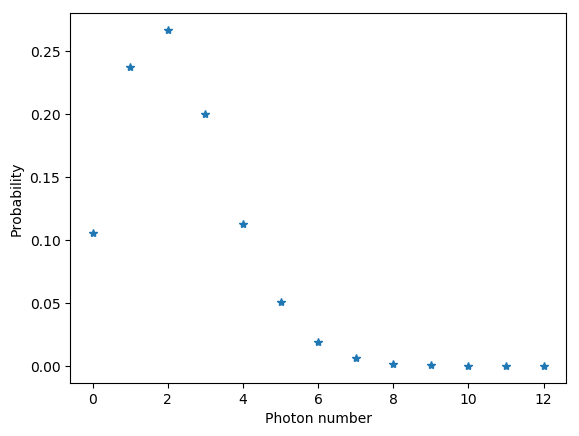

2.249989950901822 + 0.0im

In [5]:
pn = abs2.(ψα.data)
plot([0:12;],pn,"*")
xlabel("Photon number")
ylabel("Probability")

expect(a⁺*a,ψα)

Quantum optics provides also two function to calculate the Husimi Q representation and the Wigner function on a state

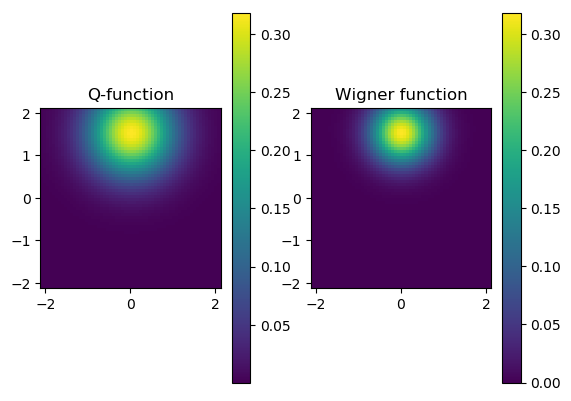

PyObject <matplotlib.colorbar.Colorbar object at 0x7f655ed18978>

In [13]:
subplot(121)
xv = [-3:.1:3;];yv = xv;
qα = qfunc(ψα,xv,yv)
pcolor(xv/sqrt(2),yv/sqrt(2),qα)
axis("square"); title("Q-function")
qα = wigner(ψα,xv,yv);
colorbar()
subplot(122)
pcolor(xv/sqrt(2),yv/sqrt(2),qα)
axis("square"); title("Wigner function")
colorbar()

We can do the same with a squeezed state which can be build using the squeezed operator
$$ S = e^{\beta (a^\dagger)^2 - \beta a^2} $$

In [7]:
β = .25
S = expm(full(β*a⁺^2 - β*a^2))

#squeezed state
ψs = S*vac;

Again we can plot the Q and the wigner function of the squeezed state, and the photon number distribution as well

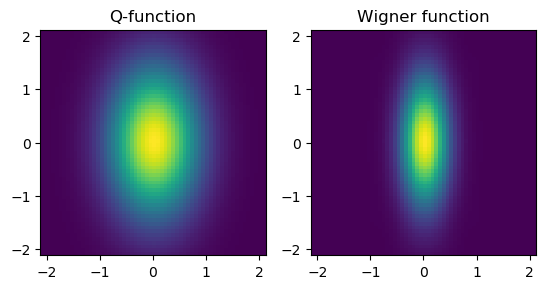

PyObject Text(0.5,1,'Wigner function')

In [8]:
subplot(121)
xv = [-3:.1:3;];yv = xv;
qα = qfunc(ψs,xv,yv)
pcolor(xv/sqrt(2),yv/sqrt(2),qα)
axis("square"); title("Q-function")
qα = wigner(ψs,xv,yv);
subplot(122)
pcolor(xv/sqrt(2),yv/sqrt(2),qα)
axis("square"); title("Wigner function")

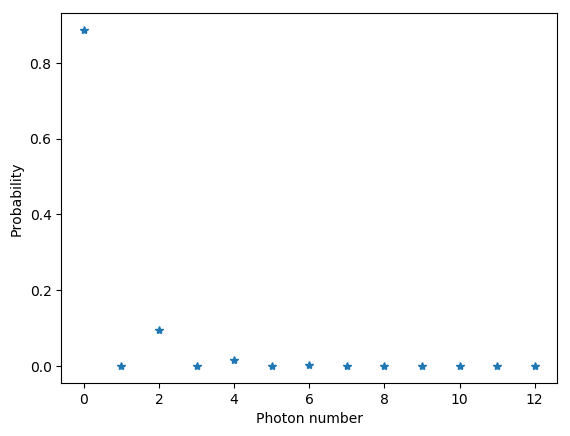

PyObject Text(24,0.5,'Probability')

In [9]:
pn = abs2.(ψs.data)
plot([0:12;],pn,"*")
xlabel("Photon number")
ylabel("Probability")

The time evolution of the squeezed state can be found using the function timeevolution

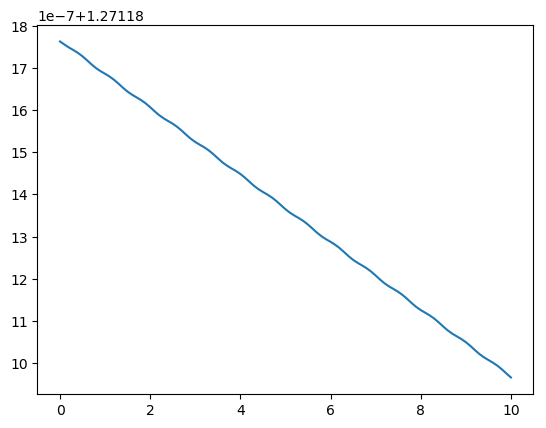

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f655f2ccb00>

In [12]:
T = [0:.1:10;]
tv,ψt = timeevolution.schroedinger(T,ψs,H)
at = expect(a⁺*a,ψt)
plot(tv,real(at))

Now we can add a cavity to our model. We introduce a jump operator $J = \sqrt{k}a$, and we solve the master equation to obtain the dynamics

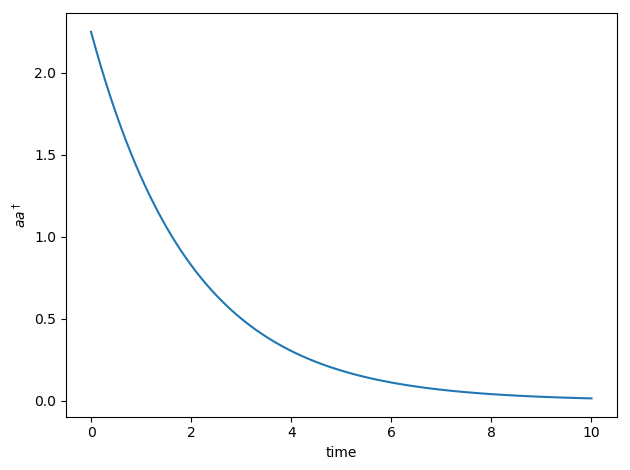

In [14]:
k = 0.5
J = [sqrt(k)*a];
# Master
n = number(b)
tout, ρt = timeevolution.master(T, ψα, H, J)
field_mean = expect(a⁺*a, ρt)

plot(T, field_mean);
xlabel("time")
ylabel(L"aa^\dagger")

tight_layout();

A driving field can be added by summing to the Hamiltonian a term of the form $\eta(a+a^\dagger)$

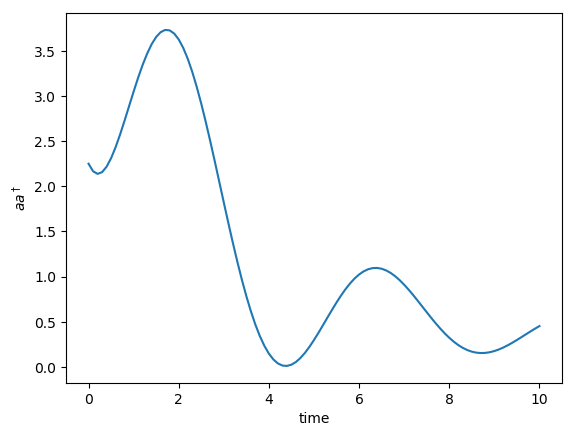

In [15]:
η = 0.9 # Pumping strength

H = H + η*(a+a⁺)

Ev,ϕ = eigenstates((H+dagger(H))/2,5); #eigenstates and eigenvalues
tout, ρt = timeevolution.master(T, ψα, H, J) #dynamics

field_mean = expect(a⁺*a, ρt)

plot(T, field_mean);
xlabel("time");
ylabel(L"aa^\dagger");